# PREDICTION CUSTOMER CHURN IN TELECOM

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [25]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.drop(['customerID'], axis='columns', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


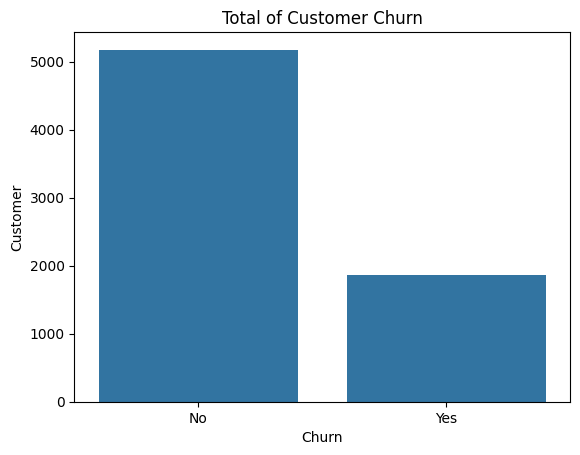

In [14]:
sns.countplot(df, x = 'Churn')
plt.title('Total of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Customer')
plt.show()

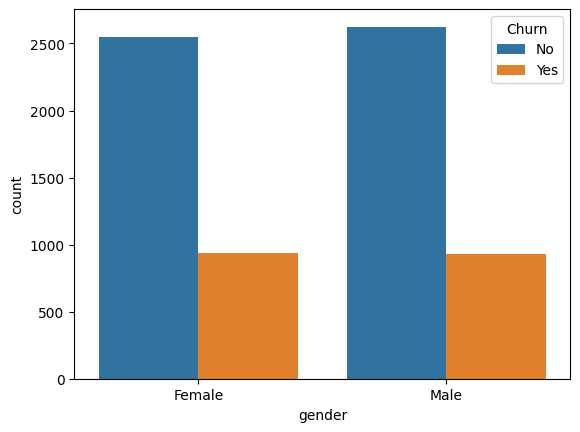

In [15]:
sns.countplot(data=df, x="gender", hue="Churn")
plt.show()

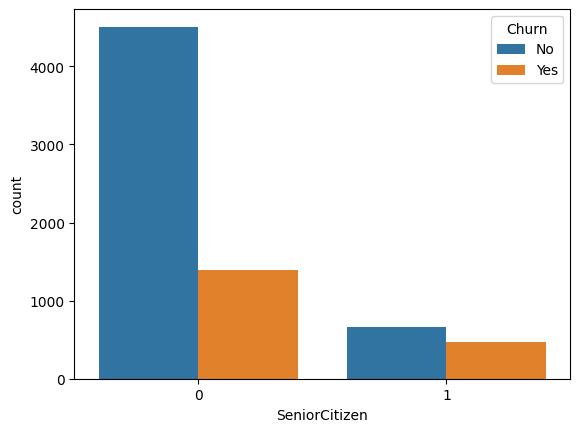

In [16]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.show()

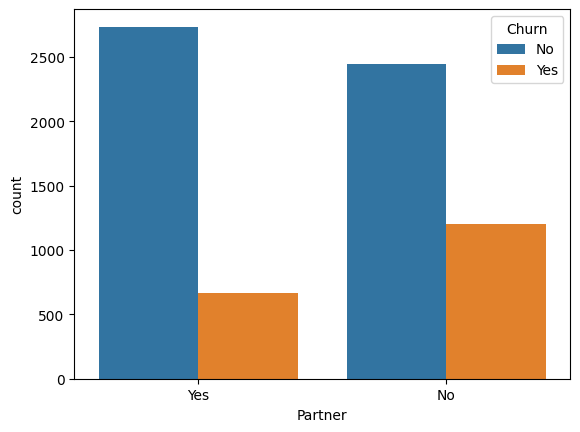

In [25]:
sns.countplot(data=df, x="Partner", hue="Churn")
plt.show()

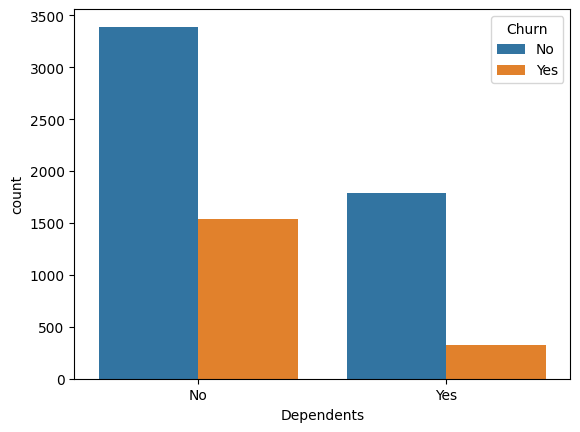

In [26]:
sns.countplot(data=df, x="Dependents", hue="Churn")
plt.show()

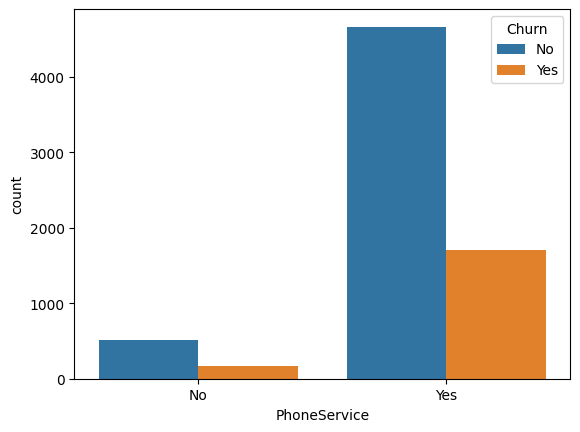

In [33]:
sns.countplot(data=df, x="PhoneService", hue="Churn")
plt.show()

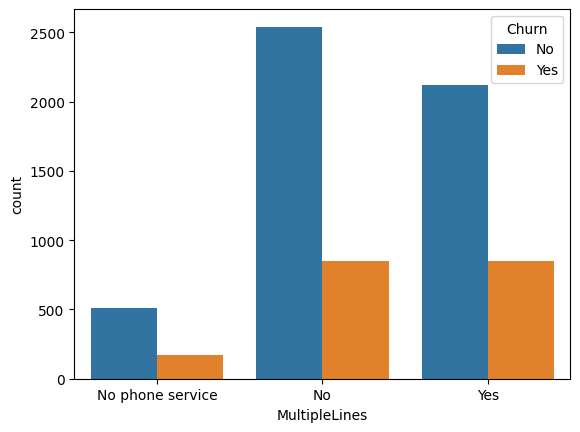

In [22]:
sns.countplot(data=df, x="MultipleLines", hue="Churn")
plt.show()

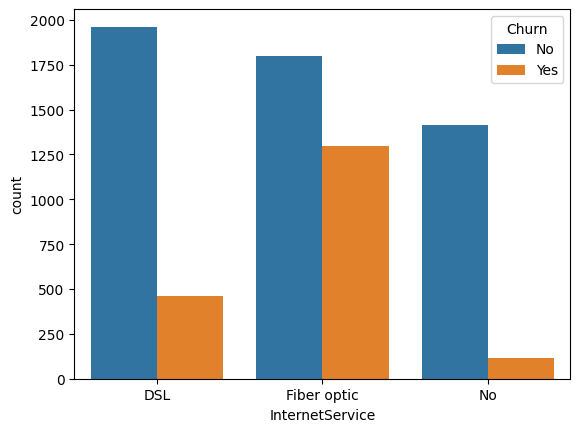

In [23]:
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.show()

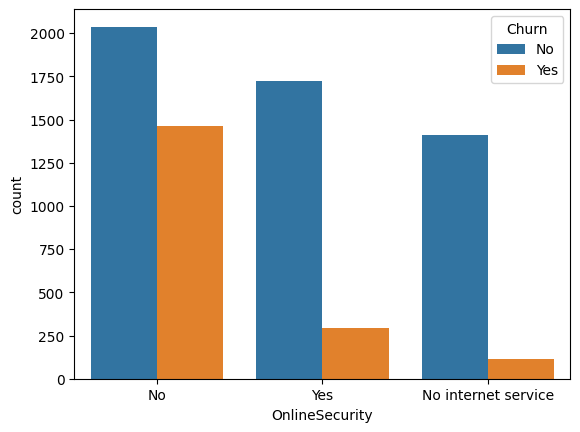

In [34]:
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.show()

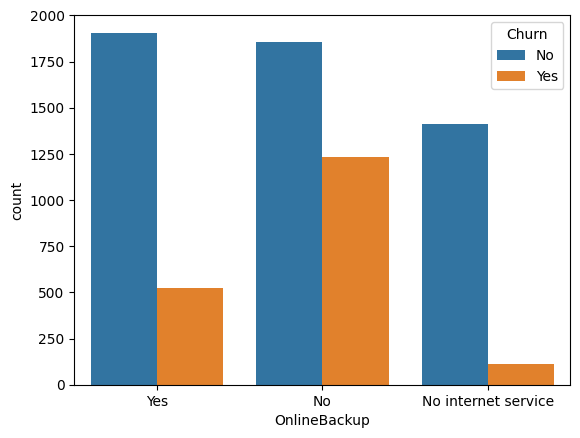

In [35]:
sns.countplot(data=df, x="OnlineBackup", hue="Churn")
plt.show()

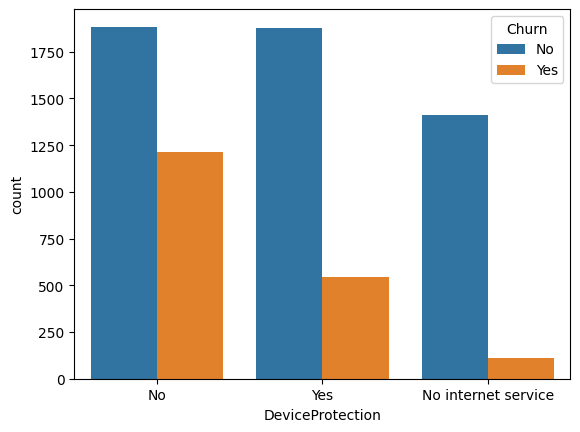

In [36]:
sns.countplot(data=df, x="DeviceProtection", hue="Churn")
plt.show()

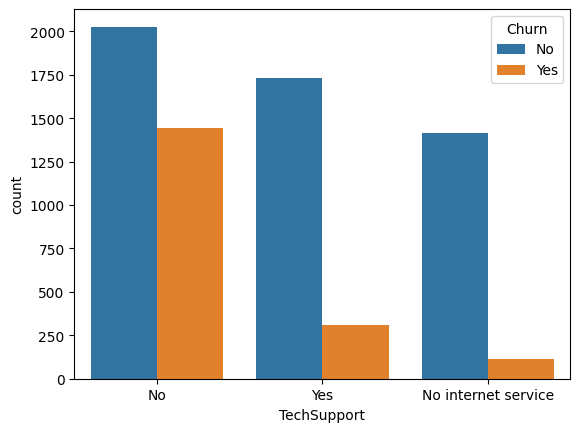

In [37]:
sns.countplot(data=df, x="TechSupport", hue="Churn")
plt.show()

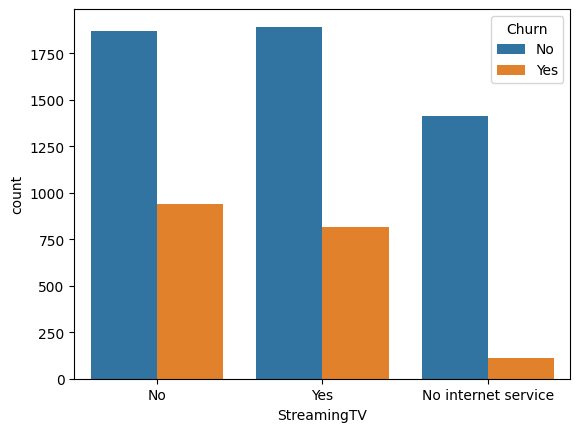

In [38]:
sns.countplot(data=df, x="StreamingTV", hue="Churn")
plt.show()

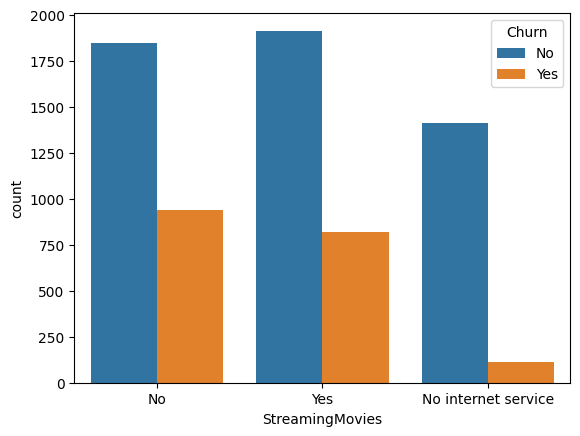

In [39]:
sns.countplot(data=df, x="StreamingMovies", hue="Churn")
plt.show()

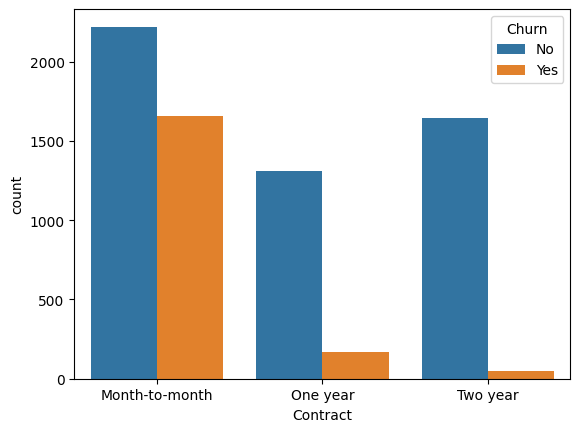

In [40]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.show()

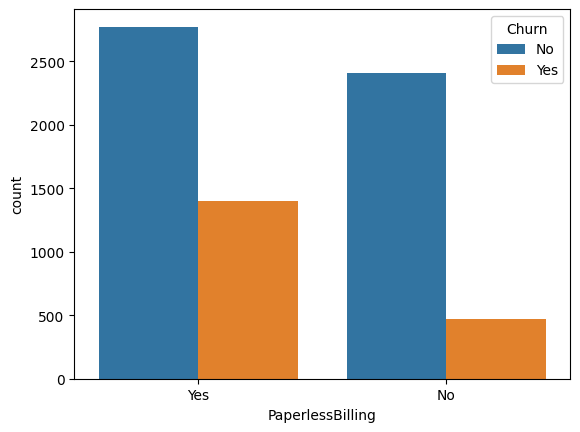

In [41]:
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.show()

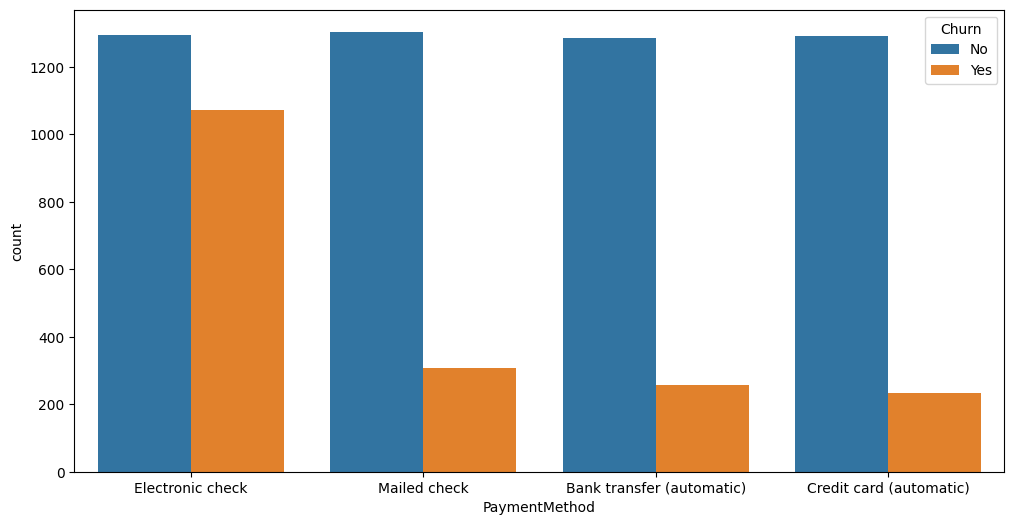

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.show()

[[<Axes: title={'center': 'SeniorCitizen'}>
  <Axes: title={'center': 'tenure'}>]
 [<Axes: title={'center': 'MonthlyCharges'}> <Axes: >]]


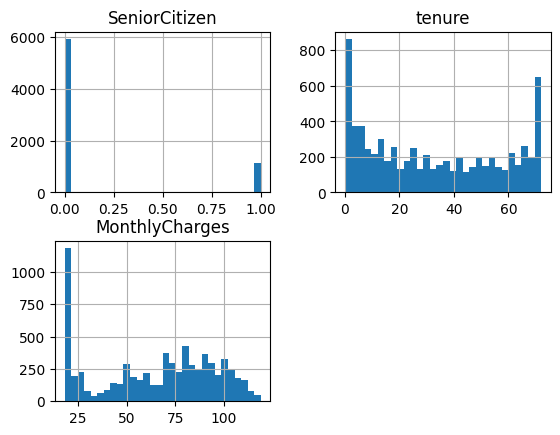

In [17]:
axList = df.hist(bins=30)
print(axList)

In [18]:
df.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
         'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], axis='columns', inplace=True)
df.head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn
0,No,Yes,No,No,No
1,Yes,No,Yes,No,No
2,Yes,Yes,No,No,Yes
3,Yes,No,Yes,Yes,No
4,No,No,No,No,Yes


# Replace Data into Integer

In [19]:
df['Churn'] = df.Churn.replace(('No', 'Yes'),(0, 1))
df['OnlineSecurity'] = df.OnlineSecurity.replace(('No internet service', 'Yes', 'No'),(2, 0, 1))
df['OnlineBackup'] = df.OnlineBackup.replace(('No internet service', 'Yes', 'No'),(2, 0, 1))
df['DeviceProtection'] = df.DeviceProtection.replace(('No internet service', 'Yes', 'No'),(2, 0, 1))
df['TechSupport'] = df.TechSupport.replace(('No internet service', 'Yes', 'No'),(2, 0, 1))

# Label Encoder & Heatmap

<Axes: >

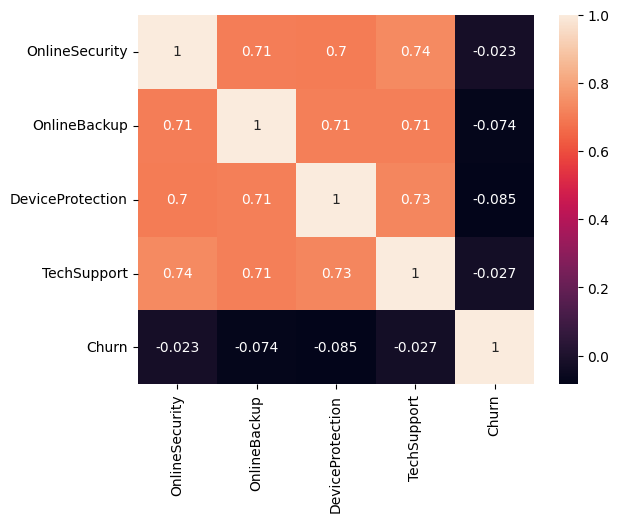

In [20]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

matrix = df.corr()
sns.heatmap(matrix, annot=True)

# Pairplot

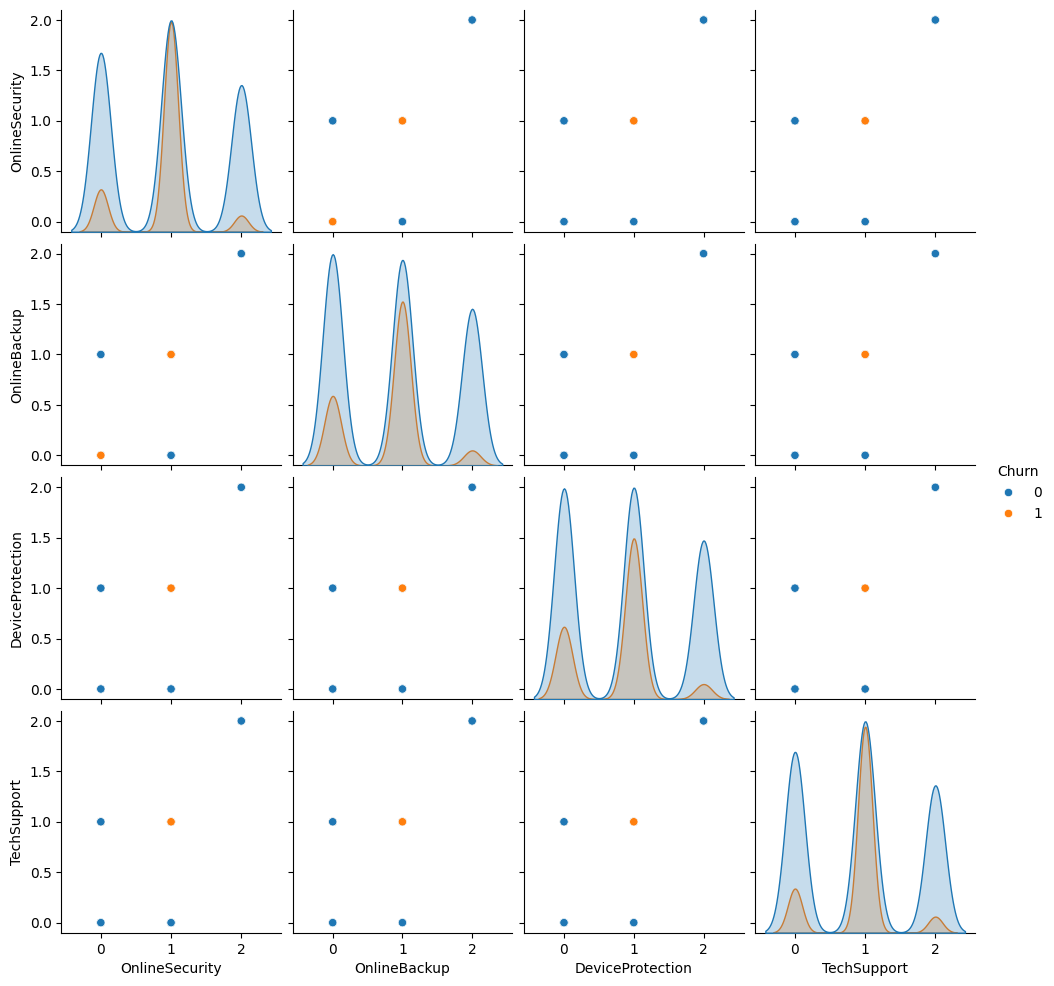

In [21]:
sns.pairplot(df, vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'], hue = 'Churn')

# Data Normalisation

In [14]:
features = df.drop('Churn', axis = 1)
label = df['Churn']

In [15]:
scaler = MinMaxScaler()

In [16]:
features_scaled = scaler.fit_transform(features)
features_scaled

array([[0.5, 0. , 0.5, 0.5],
       [0. , 0.5, 0. , 0.5],
       [0. , 0. , 0.5, 0.5],
       ...,
       [0. , 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5],
       [0. , 0.5, 0. , 0. ]])

# Train Test Split

In [17]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, 
                                                    label, 
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=2)

In [19]:
x_train.shape

(6338, 4)

In [20]:
x_test.shape

(705, 4)

# Model's Confusion Matrix

In [18]:
def cm(model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = 'Blues')
    plt.title('Confusion Matrix')
    plt.show()

# 1. Logistic Regression

In [28]:
log_reg = LogisticRegression()

def all(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_test = accuracy_score(y_pred, y_test)
    accuracy_train = model.score(x_train, y_train)
    print('Accuracy Train Model : ', accuracy_train)
    print('Accuracy Test Model : ', accuracy_test)

all(log_reg)

Accuracy Train Model :  0.7309876932786368
Accuracy Test Model :  0.7673758865248227


<Figure size 800x600 with 0 Axes>

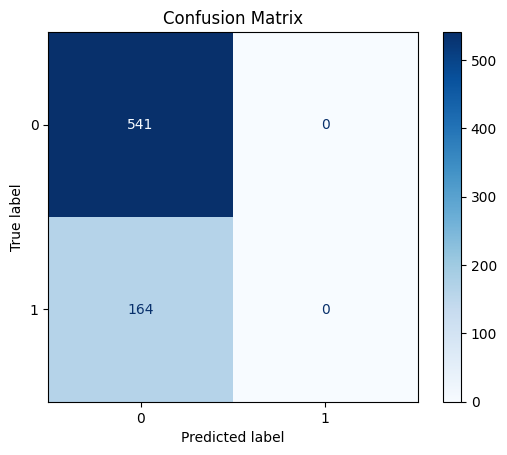

In [29]:
cm(log_reg)

In [30]:
log_reg.score(x_test, y_test)

0.7673758865248227

In [37]:
pred1 = log_reg.predict(x_test) 
cfm1 = confusion_matrix(y_test, pred1)
cfm1

array([[541,   0],
       [164,   0]])

<Axes: >

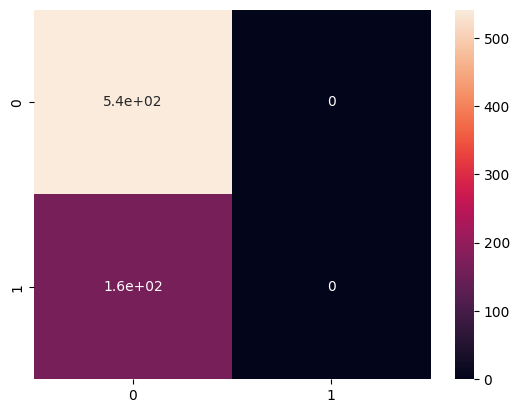

In [33]:
sns.heatmap(cfm1, annot=True)

# 2. Decision Tree Classifier

In [41]:
dtc = DecisionTreeClassifier()

def all(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_test = accuracy_score(y_pred, y_test)
    accuracy_train = model.score(x_train, y_train)
    print('Accuracy Train Model : ', accuracy_train)
    print('Accuracy Test Model : ', accuracy_test)

all(dtc)

Accuracy Train Model :  0.7570211423161881
Accuracy Test Model :  0.7730496453900709


<Figure size 800x600 with 0 Axes>

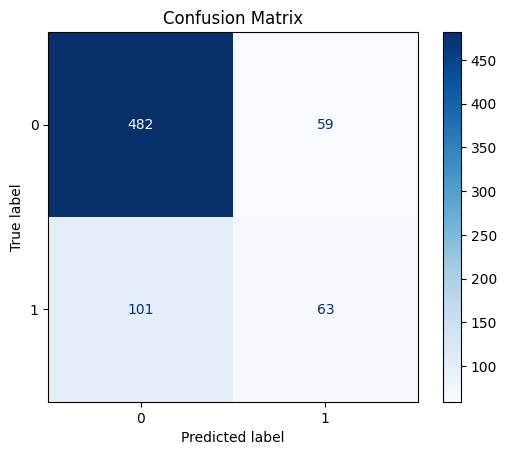

In [43]:
cm(dtc)

In [44]:
dtc.score(x_test, y_test)

0.7730496453900709

In [46]:
pred2 = dtc.predict(x_test) 
cfm2 = confusion_matrix(y_test, pred2)
cfm2

array([[482,  59],
       [101,  63]])

<Axes: >

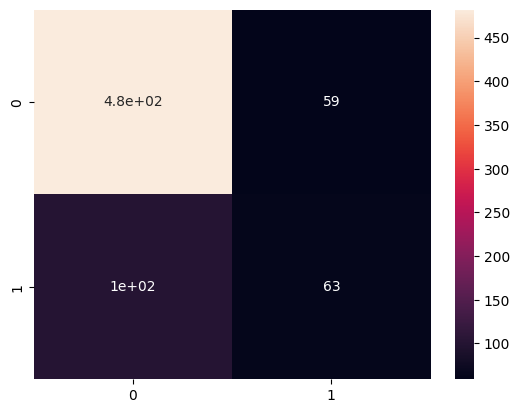

In [47]:
sns.heatmap(cfm2, annot=True)

# 3. Support Vector Classifier (SVC)

In [48]:
svc = SVC()

def all(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_test = accuracy_score(y_pred, y_test)
    accuracy_train = model.score(x_train, y_train)
    print('Accuracy Train Model : ', accuracy_train)
    print('Accuracy Test Model : ', accuracy_test)

all(svc)

Accuracy Train Model :  0.7570211423161881
Accuracy Test Model :  0.7730496453900709


<Figure size 800x600 with 0 Axes>

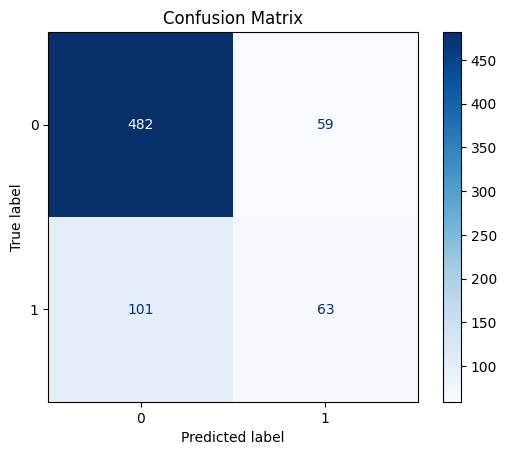

In [49]:
cm(svc)

In [52]:
svc.score(x_test, y_test)

0.7730496453900709

In [53]:
pred3 = svc.predict(x_test) 
cfm3 = confusion_matrix(y_test, pred3)
cfm3

array([[482,  59],
       [101,  63]])

<Axes: >

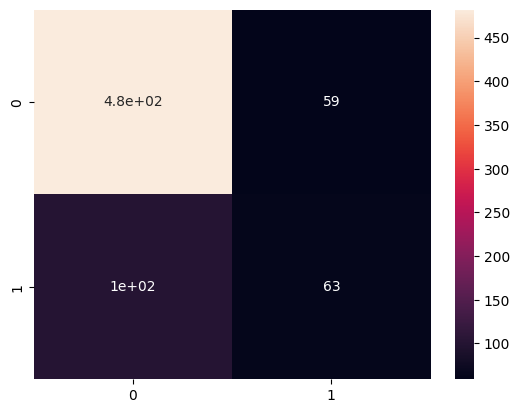

In [54]:
sns.heatmap(cfm3, annot=True)

# 4. Random Forest Classifier

In [55]:
rf_clf = RandomForestClassifier()

def all(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_test = accuracy_score(y_pred, y_test)
    accuracy_train = model.score(x_train, y_train)
    print('Accuracy Train Model : ', accuracy_train)
    print('Accuracy Test Model : ', accuracy_test)

all(rf_clf)

Accuracy Train Model :  0.7570211423161881
Accuracy Test Model :  0.7730496453900709


<Figure size 800x600 with 0 Axes>

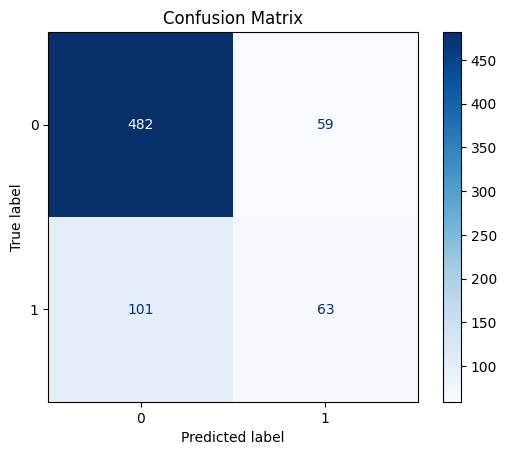

In [56]:
cm(rf_clf)

In [57]:
rf_clf.score(x_test, y_test)

0.7730496453900709

In [58]:
pred4 = rf_clf.predict(x_test) 
cfm4 = confusion_matrix(y_test, pred4)
cfm4

array([[482,  59],
       [101,  63]])

<Axes: >

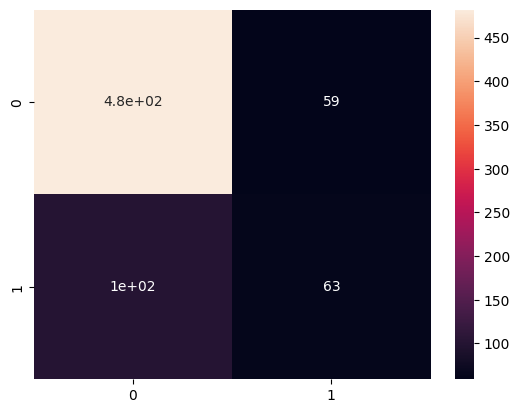

In [59]:
sns.heatmap(cfm4, annot=True)

# 5. k-Nearest Neighbours (kNN)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [21]:
knn.score(x_test, y_test)

0.7347517730496453

<Figure size 800x600 with 0 Axes>

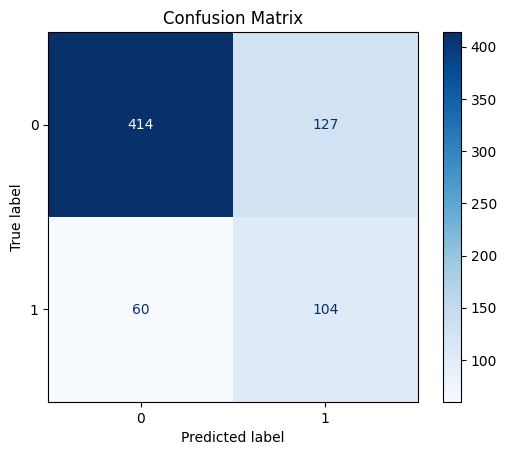

In [22]:
cm(knn)

# 6. XG Boost Classifier

In [78]:
xgb = XGBClassifier()

In [79]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
xgb.score(x_test, y_test)

0.7730496453900709

# Hyperparameter Tuning

In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=2)

In [82]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

param = {'C' : [0.01, 0.1, 1, 10, 100],
        'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

SVC_grid = GridSearchCV(SVC(kernel = 'rbf'),
                       param,
                       refit = True,
                       cv = 5,
                       verbose=3)

SVC_grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.729 total time=   0.5s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.730 total time=   0.5s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.730 total time=   0.5s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.730 total time=   0.4s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.730 total time=   0.4s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.729 total time=   0.4s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.730 total time=   0.4s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.730 total time=   0.4s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.730 total time=   0.4s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.730 total time=   0.4s
[CV 1/5] END .................C=0.01, gamma=0.1;, score=0.729 total time=   0.4s
[CV 2/5] END .................C=0.01, gamma=0.1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=3)

In [83]:
SVC_grid.best_params_

{'C': 0.01, 'gamma': 10}

In [84]:
SVC_grid.best_score_

np.float64(0.758788875037234)